# Regressão Linear

O exemplo abaixo usa apenas o primeiro atributo do conjunto de dados `diabetes`, para ilustrar as amostras em um gráfico bidimensional. A linha reta pode ser vista no gráfico, mostrando como a regressão linear tenta traçar uma linha reta que melhor minimizará o erro entre as respostas contidas no conjunto de dados e as respostas previstas pela aproximação linear.

### Importando as bibliotecas necessárias.

In [1]:
# Import all the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

### Criando a base de dados.

In [3]:
# Total number of samples.
N = 1000

# Attribute.
x = np.linspace(-1.0, 1, N).reshape(N, 1)

# Target function.
y = 2.0 + 1.5*x

# Noise vector.
w = np.random.randn(N, 1)

# Observable function (noisy version of the target function).
y_noisy = y + w

### Criando os conjuntos de treinamento e validação.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.3, random_state=seed)

### Instanciando e treinando o regressor linear.

In [5]:
# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

### Realizando predições e calculando o erro com o modelo treinado.

In [6]:
# Make predictions using the training set
y_pred_train = reg.predict(X_train)

# Make predictions using the testing set
y_pred_test = reg.predict(X_test)

# The mean squared error of the training set.
mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE treinamento:", mse_train)

# The mean squared error of the test set.
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE validação:", mse_test)

MSE treinamento: 0.9509752577202081
MSE validação: 0.9754053906255769


### Plotando o histograma.


A figura abaixo mostra a PDF de uma variável aleatória com indicações da porcentagem de valores dentre de determinadas faixas dadas pelo valor do desvio padrão.

A figura mostra que:

+ 68% dos valores estão dentro do intervalo de +/- $\sigma$, onde $\sigma$ é o desvio padrão.
+ 95% dos valores estão dentro do intervalo de +/- $2 \sigma$.
+ 99% dos valores estão dentro do intervalo de +/- $3 \sigma$.

<img src="../../figures/std_deviation.png">

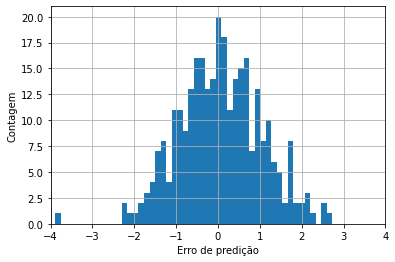

Média: 0.0621178048407141
Variância: 0.9715467689473479
Desvio padrão: 0.9856707203459723
2 x Desvio padrão: 1.9713414406919445
3 x Desvio padrão: 2.957012161037917


In [14]:
error = y_pred_test - y_test
plt.hist(error, bins=50)
plt.xlabel("Erro de predição")
plt.ylabel("Contagem")
plt.xlim([-4, 4])
plt.yticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20])
plt.grid()
plt.show()

mean = np.mean(error)
var = np.var(error)
std = np.std(error)

print('Média:', mean)
print('Variância:', var)
print('Desvio padrão:', std)
print('2 x Desvio padrão:', 2*std)
print('3 x Desvio padrão:', 3*std)

Portanto, podemos ver que 99% dos valores estão dentro do intervalo +/- 2.957012161037917, que equivale a 3 vezes o valor do desvio padrão.

Isso é facilmente comprovando através do histograma mostrado acima.

### Comparando a aproximação com os dados ruidosos.

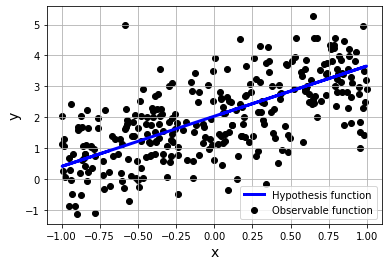

In [8]:
# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Observable function')
plt.plot(X_test, y_pred_test, color="blue", linewidth=3, label='Hypothesis function')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.legend()
plt.show()